##  Predicting the sale price of bulldozer using machine learning 

In this notebook we're going to go through an example machine learning project with th goal of predicting the sale price of bulldozer.

## 1. Problem  Defination 
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for ?

## 2. Data 
The data is dowloaded from the kaggle bluebook for bulldozers competition : https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets : 
* Train.csv is the training set, which contains data through the end of 2011.* 
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this se  throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* 
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competitio

## 3. Evaluation 
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check : https://www.kaggle.com/c/bluebook-for-bulldozers/overview

**Note :** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features
Kaggle provides data dictionary detailing all of the features of dataset. You can view this data dictionary on Google Sheets : https://docs.google.com/spreadsheets/d/1sTfNLwy-g4q2tzl3k6RXSzDt9H2w9NrbS7Xja730Ztg/edit?usp=sharing
n.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

In [17]:
# Import training and valiation sets 

df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [18]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

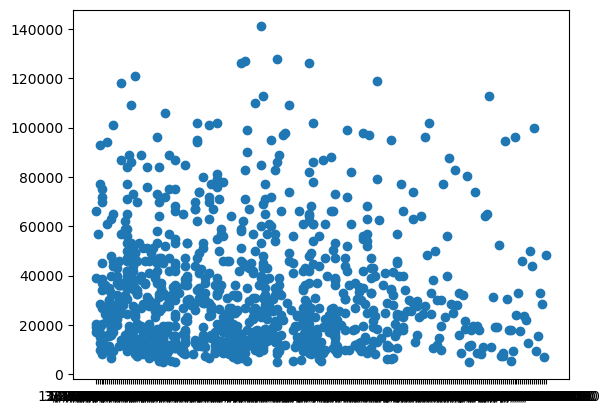

In [10]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

<Axes: >

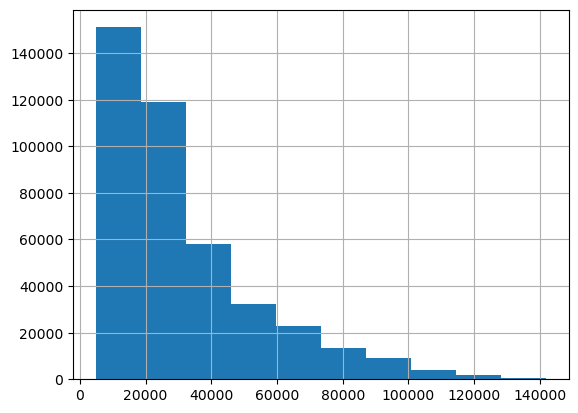

In [11]:
df.SalePrice.hist()

## Passing dates
When we work with time series data, we want to enrich the time and date component as much as possible. 
We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter

In [36]:
# Import data again but this time parse dates 
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

In [37]:
df.saledate.dtype

dtype('<M8[ns]')

In [38]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

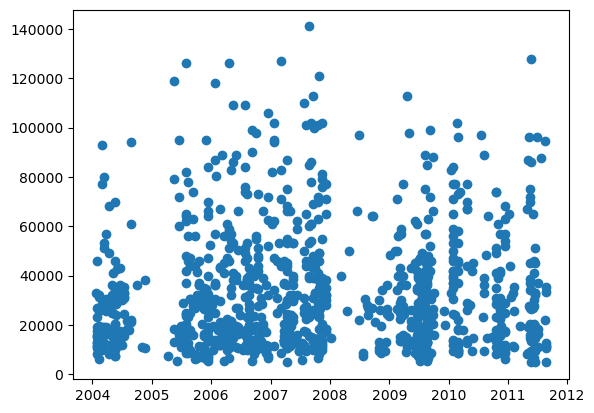

In [39]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [40]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [26]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## Sort datframe by saledate
When working with timeseries data it is good idea to sort it by date 

In [31]:
# Sort DatFrame in date order
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
128751   1989-01-31
67974    1989-01-31
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

# make copy of the orignal dataframe 
We make a copy og the original dataframe so when we manipulate the copy, we've still got our original data.

In [45]:
# make a copy 
df_temp = df.copy()

## feature engineering : creating a new feature, change one of the existing feature..  

## Add datetime parameters for `saledate` column

In [47]:
df_temp['saledate'][:1].dt.day

0    16
Name: saledate, dtype: int32

In [48]:
df_temp['saledate'][:1].dt.year

0    2006
Name: saledate, dtype: int32

In [49]:
df_temp['SaleYear']  = df_temp.saledate.dt.year
df_temp['SaleMonth']  = df_temp.saledate.dt.month
df_temp['SaleDay'] = df_temp.saledate.dt.day
df_temp['SaleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['SaledayOfYear'] = df_temp.saledate.dt.dayofyear

In [51]:
df_temp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


# Now we've enriched our DataFrame with date time deatures, we can remove saledate column

df_temp = df_temp.drop('saledate',axis=1)


In [54]:
# Check the values of differnet columns 
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling 
We've done enough EDA (We could always do more) nut let's start to do some model-driven EDA. 

In [63]:
# Let's build machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,random_state=42)

# model.fit(df_temp.drop('SalePrice',axis=1),df_temp['SalePrice'])

df_temp['UsageBand'].dtype

dtype('O')

In [67]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## convert strings to catagories 
One way turn all of our date into numbers is by converting them to pandas catogories.

In [70]:
df_temp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


In [73]:
# Find the columns whoch contain strings 
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
    


fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [77]:
# THis will turn all of the string values into catagory values 
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [80]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()
        

In [81]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [84]:
df_temp.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

Thanks to pandas catagories we now have a way to access all of our data in the form of numbers. 
But we still have a bunch of missing data....

In [87]:
# Check missing data 
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save preprocessoed data 


In [88]:
# export current temp dataframe 
df_temp.to_csv('data/bluebook-for-bulldozers/train_temp.csv',index=False)

In [91]:
# import preprocessed data 
df_temp = pd.read_csv('data/bluebook-for-bulldozers/train_temp.csv',low_memory=False)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

## Fill missing values 
## Fill numeric values 

In [98]:
# check for which numeric column have null value 
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        


auctioneerID
MachineHoursCurrentMeter


In [99]:
# Fill numeric rows with median 
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if data is missing or not 
            df_temp[label+'is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median 
            df_temp[label] = content.fillna(content.median())
            

## Mediadn is more robust than mean in large dataset 

In [100]:
df_temp.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,1139278,1139282,1139283,1139284,1139290,1139291,1139292,1139299,1139301,1139304
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0,24000.0,22500.0,36000.0,30500.0,28000.0,19000.0,13500.0,9500.0,12500.0,11500.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,1024998,319906,1052214,1068082,1058450,1004810,1026973,1002713,125790,1011914
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,4605,5255,2232,3542,5162,4604,9510,21442,7040,3177
datasource,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,2004,1998,1998,2001,2004,1999,1999,2003,2001,1991
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0,1414.0,2764.0,0.0,1921.0,320.0,2450.0,1972.0,0.0,994.0,8005.0
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,Medium,Low,NaN,Medium,Low,Medium,Low,NaN,Low,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175,310G,790ELC,416D,430HAG,988B,310G,D31E,PC200LC6,420D,214E,310E,334,45NX,302.5,580SUPER K


In [101]:
# THis will turn all of the string values into catagory values 
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [104]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

# Fill numeric rows with median 
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if data is missing or not 
            df_temp[label+'is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median 
            df_temp[label] = content.fillna(content.median())
            

In [109]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   SalesID                             412698 non-null  int64   
 1   SalePrice                           412698 non-null  float64 
 2   MachineID                           412698 non-null  int64   
 3   ModelID                             412698 non-null  int64   
 4   datasource                          412698 non-null  int64   
 5   auctioneerID                        412698 non-null  float64 
 6   YearMade                            412698 non-null  int64   
 7   MachineHoursCurrentMeter            412698 non-null  float64 
 8   UsageBand                           73670 non-null   category
 9   fiModelDesc                         412698 non-null  category
 10  fiBaseModel                         412698 non-null  category
 11  fiSecondaryDe

## Filling and turning categorical variables into numbers

In [113]:
# Check for columns which aren't numeric 
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if 

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [119]:
# Turn categorical variables into numbers and fill missing  
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing_value
        df_temp[label+'is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add+1
        df_temp[label] = pd.Categorical(content).codes+1
    

In [120]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [121]:
df_temp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mountingis_missing,True,True,True,True,True
Blade_Typeis_missing,True,True,True,True,True
Travel_Controlsis_missing,True,True,True,True,True
Differential_Typeis_missing,False,False,True,True,True


In [122]:
df_temp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as data has no missing values, we should build a machine learning model.

In [126]:
%%time
# Instantitate model
model = RandomForestRegressor(n_jobs=-1,random_state=42)

# Fit the model 
model.fit(df_temp.drop('SalePrice',axis=1),df_temp['SalePrice'])

CPU times: total: 39min 25s
Wall time: 11min 24s


RandomForestRegressor(n_jobs=-1, random_state=42)

## spliting data into train/validation sets


In [131]:
df_temp.SaleYear.value_counts()

SaleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [133]:
# SPlit data into training and validation 
df_val = df_temp[df_temp.SaleYear == 2012]
df_train = df_temp[df_temp.SaleYear !=2012]

len(df_val),len(df_train)

(11573, 401125)

In [136]:
# Split data into X & y 
X_train,y_train = df_train.drop('SalePrice',axis=1),df_train.SalePrice
X_valid,y_valid = df_val.drop("SalePrice",axis=1),df_val.SalePrice
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [137]:
y_train

0         66000.0
1         57000.0
2         10000.0
3         38500.0
4         11000.0
           ...   
401120    10500.0
401121    11000.0
401122    11500.0
401123     9000.0
401124     7750.0
Name: SalePrice, Length: 401125, dtype: float64

## Building an Evaluation Function

In [147]:
# Create Evaluation Function (The competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    '''
    calculates root mean squared log error between predictions and true labels.
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
# Create function to evaluate model on a few different levels 
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train,train_preds),
             'Valid MAE':mean_absolute_error(y_valid,val_preds),
             'Training RMSLE':rmsle(y_train,train_preds),
             'Valid RMSLE': rmsle(y_valid,val_preds),
             'Training R^2':r2_score(y_train,train_preds),
             'Valid R^2':r2_score(y_valid,val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# # This takes far too long... for experimenting
# %%time
# model = RandomForestRegressor(n_jobs=-1,random_state=42)

# model.fit(X_train,y_train)

In [143]:
%%time
# Change max samples value 

model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

model.fit(X_train,y_train)


CPU times: total: 1min 26s
Wall time: 25.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [148]:
show_scores(model)

{'Training MAE': 5554.061618822063,
 'Valid MAE': 7139.615822172297,
 'Training RMSLE': 0.25758465681614984,
 'Valid RMSLE': 0.29248380187626777,
 'Training R^2': 0.8608402371243158,
 'Valid R^2': 0.83308596217853}

### Hyperparameter tunning RandomizedSearchCV

In [153]:
%%time 
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor Hyperparameters 
rf_grid = {'n_estimators':np.arange(10,100,10),'max_depth':[None,3,5,10],'min_samples_split':np.arange(2,20,2),'min_samples_leaf':np.arange(1,20,2),
           'max_samples':[10000]}
# Instatiate RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)

# Fit the RandomizedSearchCV model 
rs_model.fit(X_train,y_train)

# Find the best params
rs_model.best_params_

# Evaluate RandomizedSearchCV Model with custom evaluation metrics

show_scores(rs_model)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 45.5 s
Wall time: 1min 41s


{'Training MAE': 6552.1431053253555,
 'Valid MAE': 7977.520921835911,
 'Training RMSLE': 0.2940684792950903,
 'Valid RMSLE': 0.3183863141224296,
 'Training R^2': 0.8126323216526286,
 'Valid R^2': 0.7887245873996842}

## train a model with the best hyperparameters 
**Note:** These were found after 100 iterations of `RandomizedSearchCV`.


In [157]:
%%time 

# Most Ideal Parmeters 
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   max_samples=None,
                                   n_jobs=-1,
                                   random_state=42)
# Fit the ideal model 
ideal_model.fit(X_train,y_train)

CPU times: total: 5min 9s
Wall time: 1min 30s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [158]:
# Scores for ideal model trained on all data 
show_scores(ideal_model)

{'Training MAE': 2951.123355082265,
 'Valid MAE': 5966.934781951541,
 'Training RMSLE': 0.144427431435229,
 'Valid RMSLE': 0.246251621813037,
 'Training R^2': 0.9589090179371786,
 'Valid R^2': 0.8819835895768973}

In [159]:
# Scores for rs_model (only trained on 10,000 examples)
shwo_scores(rs_model)

{'Training MAE': 6552.1431053253555,
 'Valid MAE': 7977.520921835911,
 'Training RMSLE': 0.2940684792950903,
 'Valid RMSLE': 0.3183863141224296,
 'Training R^2': 0.8126323216526286,
 'Valid R^2': 0.7887245873996842}

## Make preictions on test data 


In [203]:
# Import test data 

df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',low_memory=False,parse_dates=['saledate'])

df_test.head()





,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## preprocessing the test data 


In [202]:
def preprocess_data(df):
    '''
    Preprocess the data to be ready for the model to train and test on.
    '''
    df['SaleYear']  = df.saledate.dt.year
    df['SaleMonth']  = df.saledate.dt.month
    df['SaleDay'] = df.saledate.dt.day
    df['SaleDayOfWeek'] = df.saledate.dt.dayofweek
    df['SaledayOfYear'] = df.saledate.dt.dayofyear

    df.drop('saledate',axis=1,inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if data is missing or not 
                df[label+'is_missing'] = pd.isnull(content)
                # Fill missing numeric values with median 
                df[label] = content.fillna(content.median())
            


            # Filled categorical missing data and turn categories into numbers
        if  not pd.api.types.is_numeric_dtype(content):
            df[label+'is_missing'] = pd.isnull(content)
            # We add +1 to the Category Code because pandas encodes missing categories
            df[label] = pd.Categorical(content).codes+1

    

    

    return df

In [204]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [189]:
X_train.shape,df_test.shape

((401125, 102), (12457, 103))

In [205]:
# predicting test data on ideal model `
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerIDis_missing


In [206]:
# We can find how the colmuns differ using sets
set(X_train.columns)-set(df_test.columns)

{'auctioneerIDis_missing'}

In [207]:
# Manually adjust df_test to have auctioneerID_is_missing column
# df_test.drop('auctioneerID_is_missing',axis=True,inplace=True)
df_test['auctioneerIDis_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [208]:
X_train.shape

(401125, 102)

In [209]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [210]:
set(X_train.columns) - set(df_test.columns)

set()

In [214]:
# predicting test data on ideal model `
df_test = df_test.reindex(X_train.columns, axis=1)
test_preds = ideal_model.predict(df_test)


In [215]:
test_preds

array([17323.79069043, 17166.79798407, 51431.26491442, ...,
       12399.80794922, 16979.39675127, 27062.36886536])

In [217]:
# Format predictions into the same format kaggell is after 

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17323.790690
1,1227844,17166.797984
2,1227847,51431.264914
3,1227848,70764.995455
4,1227863,57971.058208
...,...,...
12452,6643171,42387.776009
12453,6643173,13221.150662
12454,6643184,12399.807949
12455,6643186,16979.396751


In [218]:
# Export prediction data to csv 
df_preds.to_csv('data/bluebook-for-bulldozers/test-prediction.csv',index=False)

## Feature Importance 



Feature Importance seeks to figureout which different attributes of data were most important when it comes to predicting the **target variable** (SalePrice).


In [220]:
# Find feature importance of our best model

len(ideal_model.feature_importances_)

102

In [230]:
# Helper function for plotting feature importance 
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({'features':columns,
                       'feature_importances':importances}).sort_values('feature_importances',ascending=False).reset_index(drop=True))
    #Plot the dataframe we created 
    fig,ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

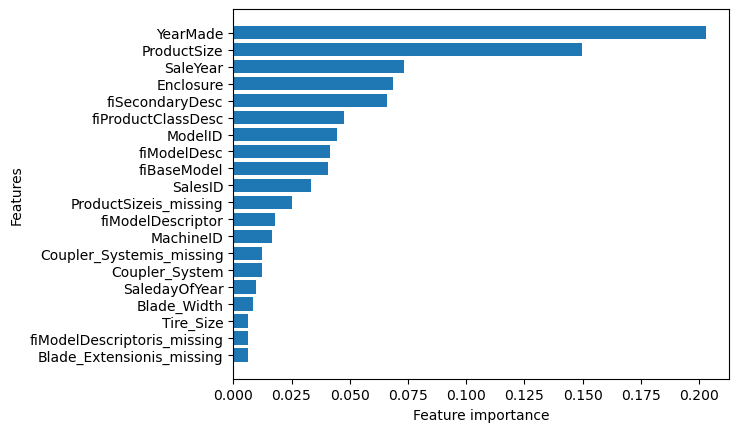

In [231]:
plot_features(X_train.columns,ideal_model.feature_importances_)


**Question to finish :** Why might knowing the feature importances of a trained machine learning model be helpful?